In [5]:
pip install pandas numpy seaborn matplotlib scikit-learn joblib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


O2: MSE = 22.22, R2 = -0.02
NO3: MSE = 18.15, R2 = 0.52
NO2: MSE = 10.61, R2 = -78.42
SO4: MSE = 2412.14, R2 = 0.41
PO4: MSE = 0.38, R2 = 0.32
CL: MSE = 34882.81, R2 = 0.74


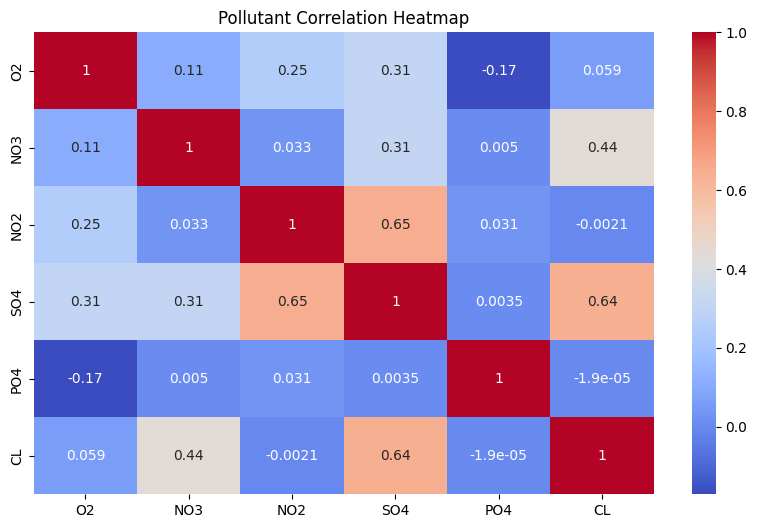

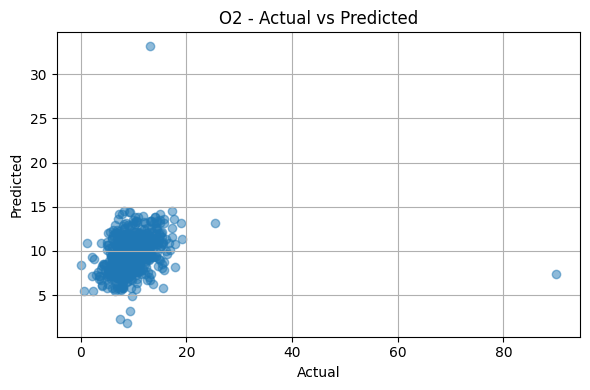

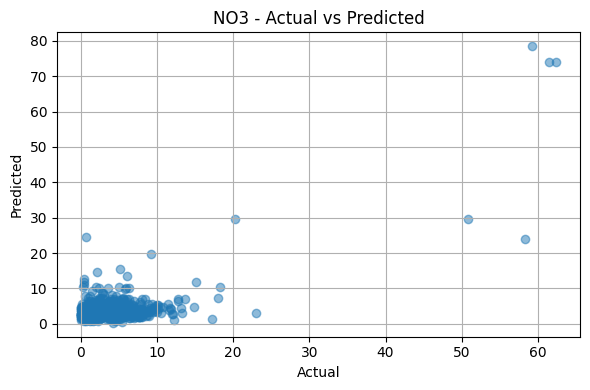

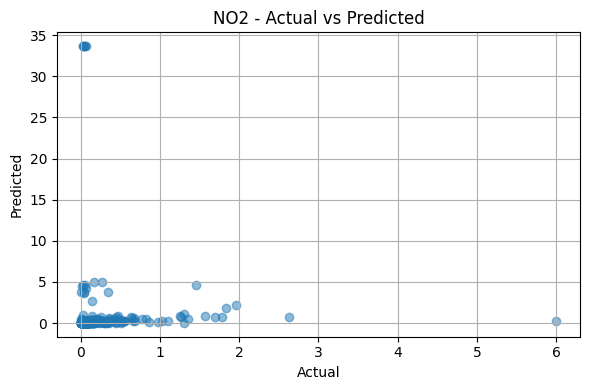

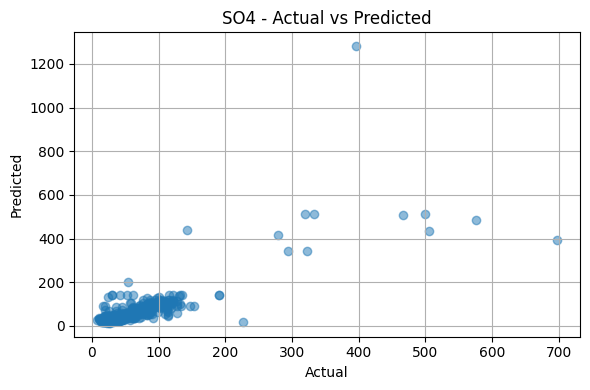

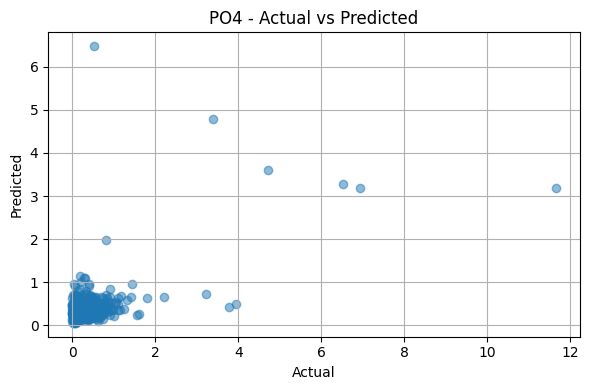

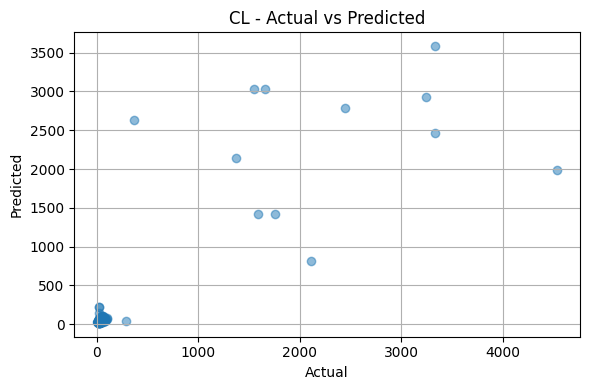


📊 Predicted pollutant levels for station 22 in 2024:
O2: 12.60
NO3: 6.90
NO2: 0.13
SO4: 143.08
PO4: 0.50
CL: 67.33


In [6]:
# WEEK 2 - Enhanced Water Quality Prediction

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load dataset
df = pd.read_csv("water_quality.csv", sep=';')
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df = df.sort_values(by=['id', 'date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Define target pollutants
pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
df = df.dropna(subset=pollutants)

# Features and target
X = df[['id', 'year']]
y = df[pollutants]
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
for i, pollutant in enumerate(pollutants):
    print(f"{pollutant}: MSE = {mean_squared_error(y_test.iloc[:, i], y_pred[:, i]):.2f}, R2 = {r2_score(y_test.iloc[:, i], y_pred[:, i]):.2f}")

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[pollutants].corr(), annot=True, cmap="coolwarm")
plt.title("Pollutant Correlation Heatmap")
plt.show()

# Actual vs Predicted
for i, pollutant in enumerate(pollutants):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5)
    plt.title(f"{pollutant} - Actual vs Predicted")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Save model
joblib.dump(model, "pollution_model.pkl")
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")

# Predict for custom input
station_id = 22
year_input = 2024
input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])
for col in X_encoded.columns:
    if col not in input_encoded.columns:
        input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]
predicted = model.predict(input_encoded)[0]

print(f"\n📊 Predicted pollutant levels for station {station_id} in {year_input}:")
for p, val in zip(pollutants, predicted):
    print(f"{p}: {val:.2f}")

